In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
datasets = pd.read_csv ('Dummy Data HSS.csv')

In [18]:
datasets.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [19]:
datasets.fillna(0, inplace=True)

In [20]:
x = datasets.drop(['Influencer','Sales'], axis=1)

In [21]:
x.head()

,TV,Radio,Social Media
0,16.0,6.566231,2.907983
1,13.0,9.237765,2.409567
2,41.0,15.886446,2.913410
3,83.0,30.020028,6.922304
4,15.0,8.437408,1.405998


In [22]:
y = datasets['Sales']

In [23]:
y.head()

0     54.732757
1     46.677897
2    150.177829
3    298.246340
4     56.594181
Name: Sales, dtype: float64

In [24]:
x2 = sm.add_constant(x)
review = sm.OLS(y, x2).fit()
review.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 6.751e+04
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:37:32   Log-Likelihood:                -18507.
No. Observations:                4572   AIC:                         3.702e+04
Df Residuals:                    4568   BIC:                         3.705e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7542      0.480      3.653      0.000       0.813       2.696
TV               3.3643      0.015    219.081      0.000       3.334       3.394
Radio            0.4652      0.044     10.458      0.000       0.378       0.552
Social Media     0.1572      0.116      1.352      0.176      -0.071       0.385
==============================================================================
Omnibus:                     5652.938   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33853986.038
Skew:                           5.341   Prob(JB):                         0.00
Kurtosis:                     424.423   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x = x.drop(['Social Media'], axis=1)

In [26]:
x.head()

,TV,Radio
0,16.0,6.566231
1,13.0,9.237765
2,41.0,15.886446
3,83.0,30.020028
4,15.0,8.437408


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=0)

In [42]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [43]:
mlr.coef_

array([3.32072984, 0.60128602])

In [44]:
mlr.intercept_

2.3928179038650796

In [45]:
mlr.score(x_test, y_test)

0.9781621956417215

In [46]:
predicted = mlr.predict(x_test)
predicted

array([162.12419887, 265.87689123, 298.32396787, ..., 163.99182681,
       284.21666418,  70.93285633])

Text(0.5, 1.0, 'Test vs Predicted')

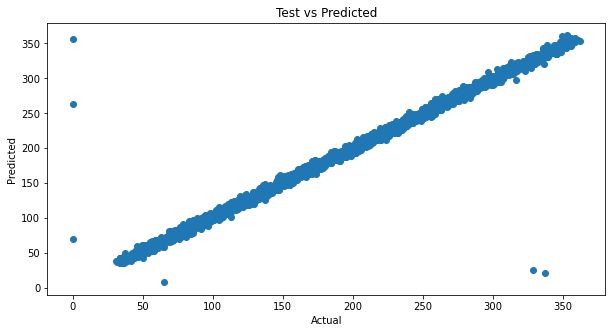

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test vs Predicted')